### Flipkart Mobile phone dataset merupakan dataset brand mobile phone dari india yang diambil dari kaggle. Berikut adalah beberapa informasi tentang kolom pada dataset ini.
1. Brand = Nama brand mobile phone
2. Model = Model/tipe mobile phone
3. Color = Warna mobile phone
4. Memory = Kapasitas memory yang dimiliki mobile phone
5. Storage = Kapasitas penyimpanan yang dimiliki mobile phone
6. Rating = Penilaian untuk mobile phone
7. Selling Price = Harga jual setelah dipotong diskon
8. Original Price = Harga jual sebelum dipotong diskon

In [33]:
#Import Library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [72]:
#membaca dataset
df = pd.read_csv('Flipkart_mobiles.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           3114 non-null   object 
 1   Model           3114 non-null   object 
 2   Color           3114 non-null   object 
 3   Memory          3071 non-null   object 
 4   Storage         3075 non-null   object 
 5   Rating          2970 non-null   float64
 6   Selling Price   3114 non-null   int64  
 7   Original Price  3114 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 194.8+ KB


In [73]:
df.head()

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990,15990
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990,15990
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990,17990
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990,17990
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990,15990


#### Handling Missing Values

In [74]:
#Melihat apakah ada data missing value
df.isnull().sum()

Brand               0
Model               0
Color               0
Memory             43
Storage            39
Rating            144
Selling Price       0
Original Price      0
dtype: int64

#### Kolom Memory, Storage, dan Ratting memiliki missing value sehingga perlu diberi tindakan

In [75]:
# Melihat missing value dari kolom memory
df[df['Memory'].isnull()].head()

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
996,Nokia,106,Black,NaN,2 MB,3.9,1400,1400
1073,Nokia,106,Black,NaN,2 MB,3.9,1519,1519
1094,Nokia,225,Black,NaN,Expandable Upto 32 GB,3.6,3499,3499
1095,Nokia,225,Black,NaN,Expandable Upto 32 GB,3.6,3499,3499
1165,Apple,iPhone 12 Pro Max,Silver,NaN,512 GB,4.6,149900,149900


#### Salah satu baris yang memiliki kolom missing value pada kolom memory adalah baris dengan brand nokia model 106. Mari kita lihat bagaiman keseluruhan data dengan brand nokia model 106.

In [76]:
## Melihat data dengan model 106
df[df['Model']=='106']

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
996,Nokia,106,Black,NaN,2 MB,3.9,1400,1400
1028,Nokia,106,Black,4 MB,4 MB,4.2,1560,1560
1073,Nokia,106,Black,NaN,2 MB,3.9,1519,1519


#### Dapat dilihat bahwa pada model 106 dari brand nokia memiliki nilai kolom memory yang tidak null. Sehingga data ini bisa dijadikan acuan untuk mengisi missing value pada brand nokia model 106. Begit juga untuk setiap missing value pada kolom memory.

In [77]:
#Identifikasi baris-baris dengan nilai kosong pada kolom 'memory'
rows_with_nan = df[df['Memory'].isnull()]

#Cari baris dengan nilai yang sama pada kolom 'brand' dan 'tipe'
for index, row in rows_with_nan.iterrows():
    brand_type_match = df[
        (df['Brand'] == row['Brand']) & (df['Model'] == row['Model']) & (df['Color'] == row['Color']) & ~df['Memory'].isnull()
    ]
    if not brand_type_match.empty:
        #Isi nilai kosong pada kolom 'memory' dengan nilai yang sesuai
        df.at[index, 'Memory'] = brand_type_match['Memory'].iloc[0]
df['Memory'].isnull().sum()

31

#### Ternyata masih ada missing value pada kolom memory dengan jumlah 31 dari 3114 data. Jumlah ini sangat kecil sehingga missing value ini perlu kita drop.

In [78]:
#Drop Missing Value
df.dropna(subset=['Memory'], inplace=True)

#### Missing value pada kolom memory juga diperlakukan sama dengan missing value pada kolom memory.

In [79]:
#dentifikasi baris-baris dengan nilai kosong pada kolom 'Storage'
rows_with_nan = df[df['Storage'].isnull()]

#Cari baris dengan nilai yang sama pada kolom 'brand' dan 'tipe'
for index, row in rows_with_nan.iterrows():
    brand_type_match = df[
        (df['Brand'] == row['Brand']) & (df['Model'] == row['Model']) & (df['Color'] == row['Color']) & ~df['Storage'].isnull()
    ]
    if not brand_type_match.empty:
        #Isi nilai kosong pada kolom 'Storage' dengan nilai yang sesuai
        df.at[index, 'Storage'] = brand_type_match['Storage'].iloc[0]
df['Storage'].isnull().sum()

0

#### Sementara missing value pada kolom ratting akan diisi dengan nilai median dari kolom ratting. hal ini dikarenakan distribusi rattingnya condong ke kanan. 

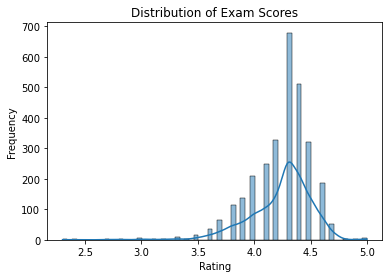

In [80]:
sns.histplot(df['Rating'], kde=True)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Exam Scores')
plt.show()

In [81]:
# Mengisi missing value kolom ratting dengan median kolom tersebut
df['Rating'] = df['Rating'].fillna(df['Rating'].median())

In [82]:
df.isnull().sum()

Brand             0
Model             0
Color             0
Memory            0
Storage           0
Rating            0
Selling Price     0
Original Price    0
dtype: int64

#### Membuat kolom discount yang diberikan dengan melihat selisih dari original price dan selling price.

In [83]:
df['discount'] = ((df['Original Price']-df['Selling Price'])/df['Original Price'])*100
df['discount'] = df['discount'].round(1)
df.head()

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price,discount
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990,15990,25.0
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990,15990,25.0
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990,17990,22.2
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990,17990,22.2
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990,15990,25.0


#### Specs Categori

In [84]:
#Cek unique value dari kolom storage
df['Storage'].unique()

array(['64 GB', '128 GB', '32 GB', '256 GB', '16 GB', '8 GB', '4 GB',
       '512 GB', '16 MB', '128 MB', '2 MB', '4 MB', '48 MB', '8 MB',
       'Expandable Upto 32 GB', 'Expandable Upto 16 GB', '10 MB',
       '256 MB', '140 MB', '64 MB', '1 TB', '153 MB', '512 MB', '100 MB',
       '129 GB', '130 GB'], dtype=object)

In [85]:
#Cek unique value dari kolom memory
df['Memory'].unique()

array(['4 GB', '6 GB', '3 GB', '8 GB', '2 GB', '12 GB', '1 GB', '512 MB',
       '1.5 GB', '768 MB', '16 GB', '18 GB', '8 MB', '64 MB', '4 MB',
       '32 MB', '16 MB', '128 MB', '4GB', '153 MB', '2 MB', '10 MB',
       '46 MB', '32 GB', '100 MB', '30 MB'], dtype=object)

In [86]:
# Menyamakan format pada kolom storage
df['Storage'] = df['Storage'].replace({'Expandable Upto 32 GB':'32 GB', 'Expandable Upto 16 GB':'16 GB', '4GB':'4 GB'})

#### Untuk mempermudah analisi pada spesifikasi mobile phone, diperlukan pengelompokan spesifikasi mobile phone tersebut.
#### Maka dari itu dibuat kolom baru bernama specs category untuk mengkategorikan spesifikasi mobile phone. Berikut adalah ketentuannya.
1. Jika nilai pada kolom memory atau kolom storage mengandung kata MB (Megabyte) maka dikategorikan low specs
2. Jika nilai pada kolom memory mengandung '1 GB','1.5 GB','2 GB','3 GB','4 GB' maka dikategorikan medium specs
3. Nilai pada kolom memory yang tidak termasuk dalam kedua poin diatas dikategorikan High Specs

In [87]:
# Membuat fungsi untuk tiap nilai kategori specs
mmed = ['1 GB','1.5 GB','2 GB','3 GB','4 GB']
def specs_category(row):
    if 'MB' in row['Memory'] or 'MB' in row['Storage']:
        return 'Low Specs'
    elif row['Memory'] in mmed:
        return 'Medium Specs'
    else:
        return 'High Specs'
# Membuat kolom baru bernama specs_category dan memasukan fungsi yang telah dibuat
df['specs_category'] = df.apply(specs_category, axis=1)
df.head()

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price,discount,specs_category
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990,15990,25.0,Medium Specs
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990,15990,25.0,Medium Specs
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990,17990,22.2,High Specs
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990,17990,22.2,High Specs
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990,15990,25.0,Medium Specs


#### Untuk mempermudah menganalisis harga jual mobile phone, maka dibuat kolom baru yang mengkategorikan harga jual mobile phone. Berikut adalah ketentuannya.
1. Kategori expensive adalah kategori dimana tiap specs kategori memiliki harga lebih dari rata-rata harga mobile phone di kategori specs tersebut.
2. Kategori Normal adalah kategori dimana tiap specs kategori memiliki harga lebih dari nilai minimal dan kurang dari nilai  rata-rata harga mobile phone di kategori specs tersebut.
3. Kategori cheap adalah kategori dimana tiap specs kategori memiliki harga minimal dari kategori specs tersebut.

In [88]:
# Melihat nilai rata-rata dan minimal tiap kategori specs 
pv = pd.pivot_table(df,index=['specs_category'],
                    aggfunc={
                        'Original Price':['mean','min','max']
                    }).reset_index()
pv.columns = ['specs_category', 'max', 'mean', 'min']
pv

,specs_category,max,mean,min
0,High Specs,189999.0,46617.790831,9290.0
1,Low Specs,17599.0,3826.045714,1000.0
2,Medium Specs,144900.0,19885.167114,2799.0


In [89]:
# Membuat fungsi untuk nilai tiap kategori harga
def price_category(row):
    if (row['specs_category']=='Low Specs' and row['Original Price']>3826) or (row['specs_category']=='Medium Specs' and row['Original Price']>19885) or (row['specs_category']=='High Specs' and row['Original Price']>46617):
        return 'Expensive'
    elif (row['specs_category']=='Medium Specs' and (row['Original Price']>2799 and row['Original Price']< 19885)) or (row['specs_category']=='High Specs' and (row['Original Price']>2799 and row['Original Price']< 46617)) or  (row['specs_category']=='Low Specs' and (row['Original Price']>1000 and row['Original Price']< 3826)):
        return 'Normal'
    else:
        return 'Cheap'
# Membuat kolom baru bernama price_category dan memasukan fungsi yang telah dibuat
df['price_category'] = df.apply(price_category, axis=1)
df.head()

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price,discount,specs_category,price_category
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990,15990,25.0,Medium Specs,Normal
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990,15990,25.0,Medium Specs,Normal
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990,17990,22.2,High Specs,Normal
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990,17990,22.2,High Specs,Normal
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990,15990,25.0,Medium Specs,Normal


In [90]:
df.head()

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price,discount,specs_category,price_category
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990,15990,25.0,Medium Specs,Normal
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990,15990,25.0,Medium Specs,Normal
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990,17990,22.2,High Specs,Normal
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990,17990,22.2,High Specs,Normal
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990,15990,25.0,Medium Specs,Normal


In [96]:
df['detail_specs'] = df['Memory']+' + '+df['Storage']

In [97]:
df.to_excel('Flipkart_clean.xlsx')

#### Melihat top 5 brand dengan total penjualan terbanyak

In [53]:
# Membuat pivot tabel berdasarkan kolom brand
pv = pd.pivot_table(df,index=['Brand'],
                    aggfunc={
                        'Model':'count',
                        'Rating':'mean',
                        'Original Price':'sum',
                        'Selling Price':'sum',
                        'discount' : lambda x: round(x.mean(), 1)
                    }).reset_index()
Brand = pv.rename(columns={'Model':'Jumlah'})
top5_brand = (Brand.sort_values('Jumlah', ascending=False)).head(5)
top5_brand

,Brand,Jumlah,Original Price,Rating,Selling Price,discount
13,SAMSUNG,703,19267252,4.209104,17444238,5.9
1,Apple,375,31264223,4.530933,30129612,4.0
15,realme,327,5833070,4.386544,5361667,8.7
11,OPPO,260,5358929,4.298462,4825727,8.5
10,Nokia,213,2167145,4.035681,2008304,5.0


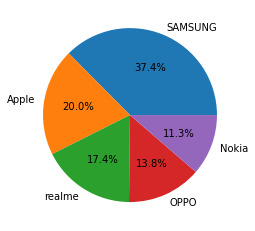

In [54]:
#Top brand based on quantity
plt.pie(data = top5_brand,x='Jumlah', labels='Brand', autopct='%1.1f%%' )
plt.show()

#### Samsung merupakan brand yang memiliki penjualan terbanyak. perbedaanya sangat signifikan dibanding dengan brand-brand lainnya. Mari kita lihat bagaimamna top 5 brand ini dari segi original price dan selling price

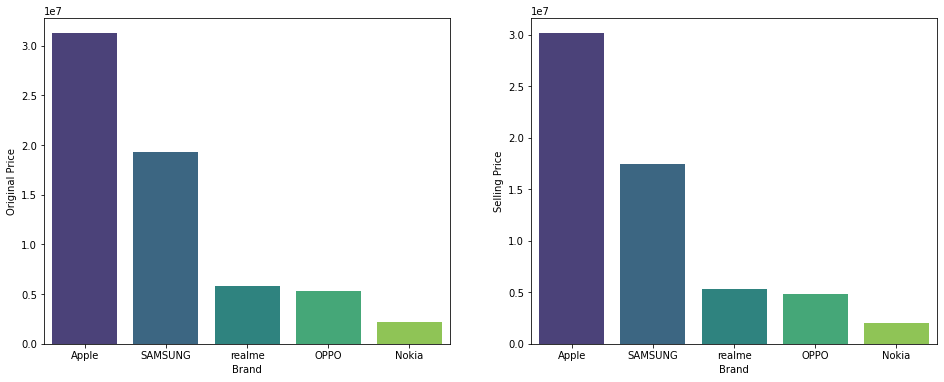

In [55]:
# Visualisasi Original price dan selling price
_,axes=plt.subplots(nrows=1,ncols=2,figsize=(16,6))
sns.barplot(x='Brand',y='Original Price',data=top5_brand.sort_values('Original Price',ascending=False),palette='viridis',ax=axes[0])
sns.barplot(x='Brand',y='Selling Price',data=top5_brand.sort_values('Selling Price',ascending=False),palette='viridis',ax=axes[1])

plt.show()

#### Jika dilihat dari harga jual, brand appple lebih mahal dibanding dengan brand lainnya. Perbedaan harga ini terlihat cukup signifikan

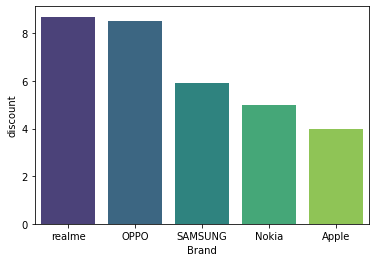

In [70]:
#Top brand based on discount
sns.barplot(x='Brand',y='discount',data=top5_brand.sort_values('discount',ascending=False),palette='viridis')
plt.show()

#### Brand realme memiliki rata-rata discount paling besar dengan nilai 8%. Tetapi hal ini tidak membuat brand realm memiliki tingkat penjualan yang tinggi. Berbeda dengan brand samsung dan apple,  yang hanya memberikan diskon sekitar 4-5 % tetapi memiliki tingkat penjualan yang tinggi.

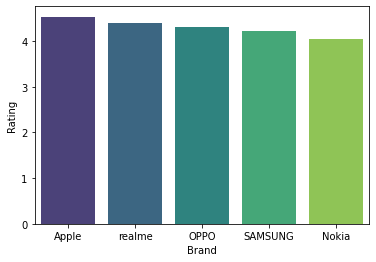

In [57]:
#Top brand based on discount
sns.barplot(x='Brand',y='Rating',data=top5_brand.sort_values('Rating',ascending=False),palette='viridis')
plt.show()

#### Jika dilihat dari ratting yang diberikan, untuk top 5 brand paling banyak diminati rata-rata mendapatkan ratting diatas 4. hal ini menandakan kepuasan pelanggan terhadap ke 5 brand ini cukup bagus.

#### Selanjutnya kita akan melihat spesifikasi mobile phone apa yang paling diminati.

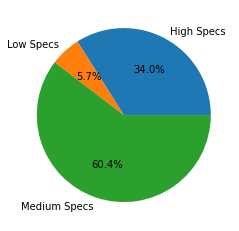

In [94]:
# Membuat pifot tabel berdasarkan kolom specs_category
pv = pd.pivot_table(df,index=['specs_category'],
                    aggfunc={
                        'Model':'count'
                    }).reset_index()
Specs = pv.rename(columns={'Model':'Jumlah'})
plt.pie(data = Specs,x='Jumlah', labels='specs_category', autopct='%1.1f%%' )
plt.show()

In [95]:
Specs

,specs_category,Jumlah
0,High Specs,1047
1,Low Specs,175
2,Medium Specs,1861


#### Dapat dilihat bahwa mobile phone dengan mediem specs paling banyak diminati dengan presentase sebesar 60% dari total penjualan.

In [59]:
# Membuat pivot tabel berdasarlam kolom memory dan storage.
pv = pd.pivot_table(df,index=['Memory','Storage'],
                    aggfunc={
                        'Model':'count',
                        'specs_category':'first'
                    }).reset_index()
Specs = pv.rename(columns={'Model':'Jumlah'})
# Mengurutkan baris dari yang terbesar berdasarkan kolom jumlah.
top_specs = Specs.sort_values('Jumlah', ascending=False).head(5)
#Membuat kolom baru bernama 'Specs_Memory+Storage' untuk mempermudah analisis
top_specs['Specs_Memory+Storage'] = top_specs['Memory']+' & '+top_specs['Storage']
top_specs

,Memory,Storage,Jumlah,specs_category,Specs_Memory+Storage
46,4 GB,64 GB,540,Medium Specs,4 GB & 64 GB
35,3 GB,32 GB,353,Medium Specs,3 GB & 32 GB
68,6 GB,128 GB,326,High Specs,6 GB & 128 GB
79,8 GB,128 GB,258,High Specs,8 GB & 128 GB
26,2 GB,16 GB,204,Medium Specs,2 GB & 16 GB


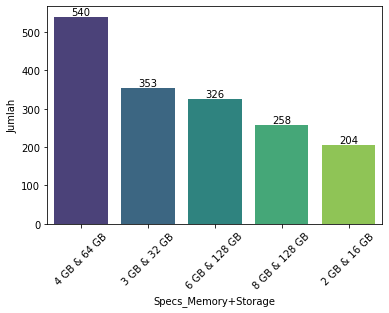

In [60]:
# Visualisasi kolom Specs_Memory+Storage
sns.barplot(x='Specs_Memory+Storage',y='Jumlah',data=top_specs, palette='viridis')
plt.xticks(rotation=45)
for index, value in enumerate(top_specs['Jumlah']):
    plt.annotate(str(value), xy=(index, value), ha='center', va='bottom')
plt.show()

#### Lebih spesifiknya, mobile phone dengan specs memory 4 GB dan storage 64 GB paling banyak diminati. diikuti oleh mobile phone dengan specs memory 3 GB dan storage 32 GB

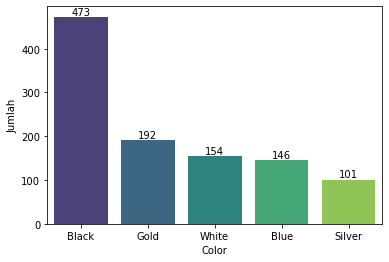

In [61]:
# Membuat pivot tabel untuk melihat data penjualan berdasarkan warna mobile phone
pv = pd.pivot_table(df,index=['Color'],
                    aggfunc={
                        'Model':'count'
                    }).reset_index()
Colors = pv.rename(columns={'Model':'Jumlah'})
Colors = Colors.sort_values('Jumlah',ascending = False).head(5)
sns.barplot(x='Color',y='Jumlah',data=Colors, palette='viridis')
for index, value in enumerate(Colors['Jumlah']):
    plt.annotate(str(value), xy=(index, value), ha='center', va='bottom')
plt.show()

#### Mobile phone dengan warna black merupakan barang paling banyak dijual. perbedaanya sangat signifikan dengan warna lainnya.

#### Selanjutnya kita akna melihat bagaimana data penjualan berdasarkan kategori harga

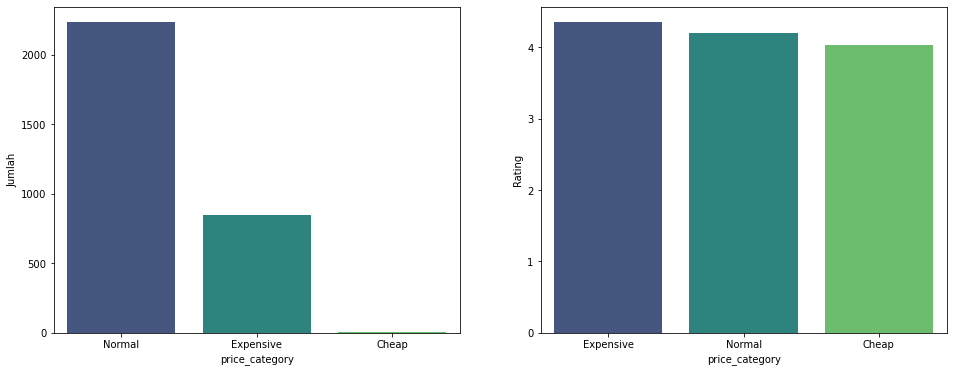

In [62]:
# Membuat pivot tabel berdasarkan price category.
pv = pd.pivot_table(df,index=['price_category'],
                    aggfunc={
                        'Rating': 'mean',
                        'discount' : 'mean',
                        'Model' : 'count'
                    }).reset_index()
_,axes=plt.subplots(nrows=1,ncols=2,figsize=(16,6))
pv = pv.rename(columns={'Model':'Jumlah'})
sns.barplot(x='price_category',y='Rating',data=pv.sort_values('Rating',ascending = False), palette='viridis',ax=axes[1])
sns.barplot(x='price_category',y='Jumlah', data=pv.sort_values('Jumlah',ascending=False), palette='viridis',ax=axes[0])
plt.show()

#### Jumlah penjualan dengan harga normal lebih banyak dibanding kategori lainnya. Perbandingannyapun sangat jauh dengan kategori lainnya.
#### Namun, jika dilihat dari ratting yang diberikan,  semua kategori harga rata-rata diberikan ratting lebih dari 4. Sehingga dapat dipastikan bahwa pembeli tidak keberatan dengan harga yang diberikan danpuas dengan barang yang diterima.